In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Example 7.2.12.**

Suppose $X_1, X_2, \ldots, X_n$ are independent and identically distributed random variables, each having the $U(0,1)$ distribution.  

We take $n = 100$ to $1100$ with an increment of $200$ and simulate $300$ observations for each $n$.  

From the $300$ simulated values of $X_n$ and $X_1$, we find the means $M_n$ and $m_n$ as estimates of $E(X_n)$ and $E(X_1)$, respectively.  

We also find $V_n$ and $W_n$ as the means of $(X_n - 1)^2$ and $(X_1)^2$ as estimates of $E\!\left[(X_n - 1)^2\right]$ and $E\!\left[(X_1 - 0)^2\right]$, respectively.


In [2]:
np.random.seed(99)
a = 0; b = 1
nvec = np.arange(100,1300,step=200)
nsim = 300
sample_matrix = np.random.uniform(a,b,size=(nsim,max(nvec)))

C = 1; c = 0

Mn = []
mn = []
Vn = []
Wn = []

In [3]:
for n in nvec:
    sample = sample_matrix[:,:n]
    umax = sample.max(axis=1)
    umin = sample.min(axis=1)
    Mn.append(umax.mean())
    mn.append(umin.mean())
    Vn.append(((umax - C)**2).mean())
    Wn.append(((umin - c)**2).mean())

In [4]:
import pandas as pd

d = pd.DataFrame({'n': nvec, 'Mn':Mn, 'mn':mn, 'Vn':Vn, 'Wn':Wn})

print(round(d,4))

      n      Mn      mn      Vn      Wn
0   100  0.9890  0.0105  0.0002  0.0002
1   300  0.9966  0.0035  0.0000  0.0000
2   500  0.9980  0.0019  0.0000  0.0000
3   700  0.9986  0.0014  0.0000  0.0000
4   900  0.9989  0.0012  0.0000  0.0000
5  1100  0.9991  0.0009  0.0000  0.0000


We note that $M_n \to 1, m_n \to 0$ and both $V_n$ and $W_n$ converge to 0 as $n$ increases.

**Example 7.2.16.**

We have $X \sim U(0,1)$ then $X_n \to 1$ and $X_1 \to 0$. Further suppose $Y_n = \bar{X_n}$ and $M_n$ is a sample median based on random sample ${X_1, X_2, \dots, X_n}$. It follows that $Y_n \xrightarrow{p} 1/2$ and $M_n \xrightarrow{p} 1/2.$ 

We generate samples from the uniform distribution and obtain estimates of $P[|X_(n) - 1| < \epsilon]$, $P[|X_1| < \epsilon]$, $P[|Y_n - 1/2| < \epsilon]$ and $P[|M_n - 1/2| < \epsilon]$.

We examine their behaviour as $n$ increases to verify the convergence in probability.

In [11]:
import numpy as np
nvec = np.arange(100,700,step = 100)
nsim = 500
sample_matrix = np.random.uniform(0,1,size=(nsim,max(nvec)))
epvec = np.array([0.01, 0.02, 0.03])
prob_matrx_1=np.zeros((len(epvec),len(nvec)))
prob_matrx_2=np.zeros((len(epvec),len(nvec)))
prob_matrx_3=np.zeros((len(epvec),len(nvec)))
prob_matrx_4= np.zeros((len(epvec),len(nvec)))

In [12]:
for j, ep in enumerate(epvec):
    for i,n in enumerate(nvec):
        sample = sample_matrix[:, :n]
        umax = sample.max(axis=1)
        umin = sample.min(axis=1)
        sample_mean = sample.mean(axis = 1)
        sample_meadian = np.median(sample,axis = 1)
        p1 = (np.abs(umax - 1)<ep).sum()/nsim
        p2 = (np.abs(umin - 0)<ep).sum()/nsim
        p3 = (np.abs(sample_mean - 0.5)<ep).sum()/nsim
        p4 = (np.abs(sample_meadian - 0.5)<ep).sum()/nsim
        prob_matrx_1[j,i] = p1
        prob_matrx_2[j,i] = p2
        prob_matrx_3[j,i] = p3
        prob_matrx_4[j,i] = p4

In [13]:
measures = ["Maximum", "Minimum", "Mean", "Median"]
matrices = [prob_matrx_1, prob_matrx_2, prob_matrx_3, prob_matrx_4]

for name, mat in zip(measures, matrices):
    print(name)
    display(mat)

Maximum


array([[0.624, 0.864, 0.946, 0.978, 0.99 , 0.994],
       [0.874, 0.992, 0.998, 1.   , 1.   , 1.   ],
       [0.954, 0.996, 0.998, 1.   , 1.   , 1.   ]])

Minimum


array([[0.64 , 0.874, 0.964, 0.994, 0.998, 1.   ],
       [0.88 , 0.982, 0.996, 1.   , 1.   , 1.   ],
       [0.96 , 0.998, 1.   , 1.   , 1.   , 1.   ]])

Mean


array([[0.278, 0.408, 0.472, 0.526, 0.546, 0.58 ],
       [0.512, 0.7  , 0.788, 0.824, 0.876, 0.904],
       [0.702, 0.87 , 0.942, 0.972, 0.974, 0.99 ]])

Median


array([[0.162, 0.202, 0.306, 0.312, 0.322, 0.374],
       [0.294, 0.42 , 0.538, 0.578, 0.626, 0.684],
       [0.44 , 0.59 , 0.732, 0.784, 0.834, 0.87 ]])

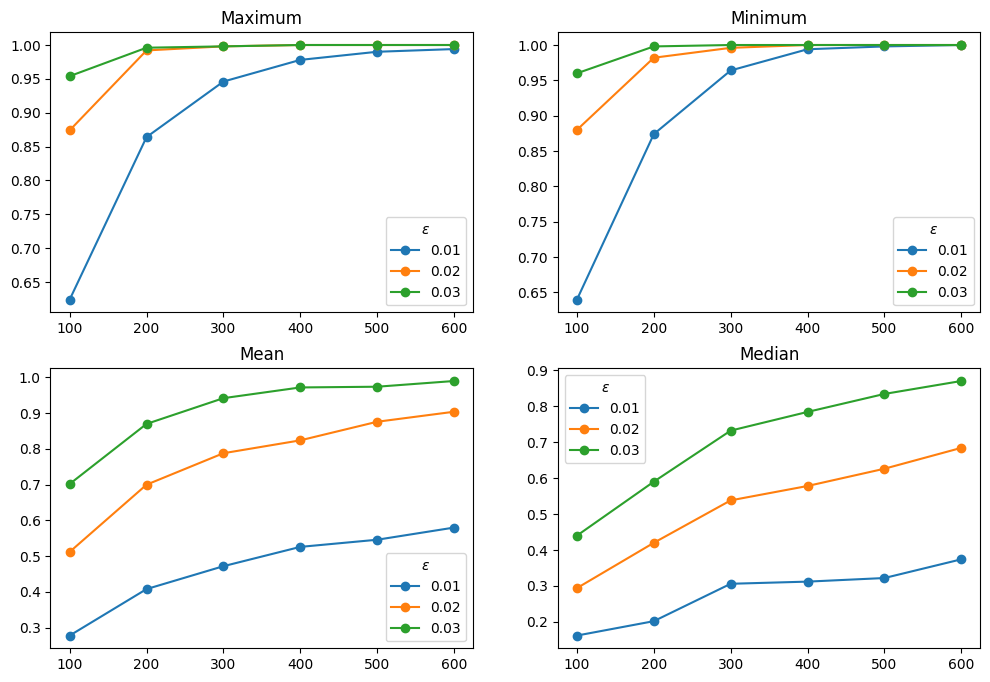

In [26]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,2,figsize=(12,8))

axes[0,0].plot(nvec,prob_matrx_1.T,marker = 'o')
axes[0,0].set_title("Maximum")
axes[0,0].legend(epvec, title = r"$\epsilon$")

axes[0,1].plot(nvec,prob_matrx_2.T,marker = 'o')
axes[0,1].set_title("Minimum")
axes[0,1].legend(epvec, title = r"$\epsilon$")

axes[1,0].plot(nvec,prob_matrx_3.T,marker = 'o')
axes[1,0].set_title("Mean")
axes[1,0].legend(epvec, title = r"$\epsilon$")

axes[1,1].plot(nvec,prob_matrx_4.T,marker = 'o')
axes[1,1].set_title("Median")
axes[1,1].legend(epvec, title = r"$\epsilon$")


**Example 7.2.17.**

Suppose $X_1, X_2, \dots, X_n$ are independent and indetically distributed random variables, each following the standard normal distribution. Then we have $\bar{X} \xrightarrow{p} 0$ and $M_n \xrightarrow{p} 0$ where $M_n$ denotes the sample median. We simulate the samples from the standard normal distribution for $n = 100, 300, 500, 700, 900$ and find the relative frequency $rf_n$. We then examine whether it converges to 1. We further examine the rate of its convergence to 1 for the sample mean and the sample median. Following is the code:

In [2]:
import numpy as np
nvec = np.arange(100,1100,step=200)
nsim = 300

epvec = np.array([0.05,0.08,0.1])

np.random.seed(0)
sample_matrix = np.random.normal(loc=0,scale=1,size=(nsim,max(nvec)))

In [11]:
prob_mat_mean = np.zeros((len(epvec),len(nvec)))
prob_mat_median = np.zeros((len(epvec),len(nvec)))

In [12]:
for i, ep in enumerate(epvec):
    for j, n in enumerate(nvec):
        sample = sample_matrix[:,:n]
        sample_mean = sample.mean(axis=1)
        sample_median = np.median(sample,axis=1)
        p1 = (np.abs(sample_mean)<ep).sum()/nsim
        p2 = (np.abs(sample_median)<ep).sum()/nsim
        prob_mat_mean[i,j] = p1
        prob_mat_median[i,j] = p2

In [14]:
prob_mat_median

array([[0.36666667, 0.54333333, 0.66666667, 0.73333333, 0.81      ],
       [0.52333333, 0.73333333, 0.87      , 0.91666667, 0.97333333],
       [0.61333333, 0.83      , 0.94666667, 0.97333333, 0.99      ]])

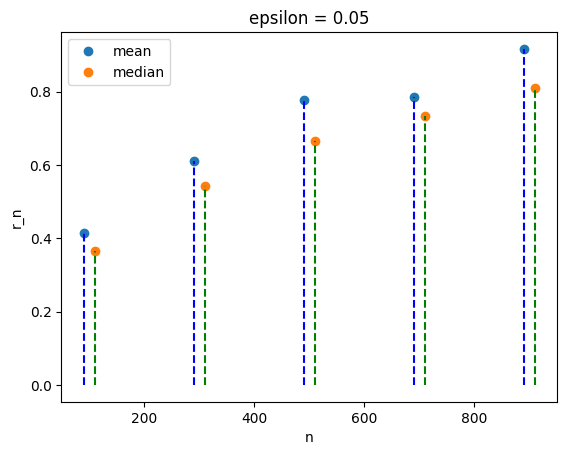

In [39]:
import matplotlib.pyplot as plt
offset=10
plt.plot(nvec-offset,prob_mat_mean[0,:],'o',label='mean')
plt.plot(nvec+offset,prob_mat_median[0,:],'o',label='median')
plt.vlines(nvec - offset, 0, prob_mat_mean[0,:], linestyles='dashed',colors='blue')
plt.vlines(nvec + offset, 0, prob_mat_median[0,:], linestyles='dashed',colors='green')

plt.title("epsilon = 0.05")

plt.xlabel('n')
plt.ylabel('r_n')
plt.legend()

plt.show()

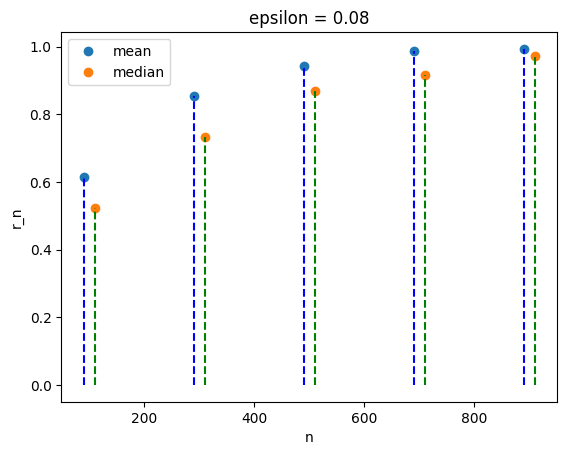

In [ ]:
import matplotlib.pyplot as plt
offset=10
plt.plot(nvec-offset,prob_mat_mean[1,:],'o',label='mean')
plt.plot(nvec+offset,prob_mat_median[1,:],'o',label='median', colors='green')
plt.vlines(nvec - offset, 0, prob_mat_mean[1,:], linestyles='dashed',colors='blue')
plt.vlines(nvec + offset, 0, prob_mat_median[1,:], linestyles='dashed',colors='green')

plt.title("epsilon = 0.08")
plt.xlabel('n')
plt.ylabel('r_n')

plt.legend()

plt.show()

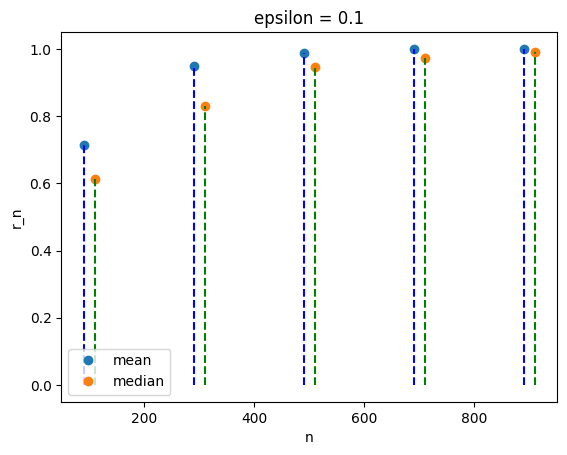

In [ ]:
import matplotlib.pyplot as plt
offset=10
plt.plot(nvec-offset,prob_mat_mean[2,:],'o',label='mean')
plt.plot(nvec+offset,prob_mat_median[2,:],'o',label='median', colors='green')
plt.vlines(nvec - offset, 0, prob_mat_mean[2,:], linestyles='dashed',colors='blue')
plt.vlines(nvec + offset, 0, prob_mat_median[2,:], linestyles='dashed',colors='green')

plt.title("epsilon = 0.1")
plt.xlabel('n')
plt.ylabel('r_n')

plt.legend()

plt.show()

**Example 7.3.4**

Suppose ${X_1, X_2, \dots, X_n}$ are independent and indentically distributed random variables, each having $U(0, \theta)$ distribution. Then we have $Y_n \xrightarrow{L} Y,$ where $Y$ has an exponential distribution with location parameter 0 and scale parameter ${1/\theta}$. Following code verify that. We take $n = 40, 60, 80, 100 ~and ~\theta = 0.2$